In [78]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend, activations
from tensorflow.keras import optimizers, losses, metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D

import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from PIL import Image

seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

# NSL_12

This is the last notebook of the numerical simulation laboratory. In this notebook, the objective is to train a deep neural network that can recognize written ddigits between 0 and 9. \
First of all, some optimization functions are tested and compared on a relatively simple DNN. In the second exercise a CNN is set up to upgrade the ability to recognize digits. Finally, in the last one, the CNN is tested on a set of 10 digits written using the software gimp.\
The training and the validation dataset exploited to train the networks are taken from the repository mnist. In particular, the training dataset consists in 60000 images 28x28 and the corresponding labels while the test dataset has 10000 images 28x28 and the relative labels.\
The following code imports the dataset and reshape the images from 28x28 matrices to vectors of length 784.

In [42]:
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

### EX 12_1

To begin, stochastic gradient descent, adam and nadam are tested and compared to find the best in terms of accuracy/loss. \
The network used is a DNN consisted in 3 dense layers: a first layer of 400 neurons with input shape 784 and a relu activation function, a second layer of 100 neurons with a relu activation function and a final layer with 10 neurons and a softmax activation function. A dropout is also addedd between the third and fourth layer. \
The network is trained with the categorical cross entropy as loss function for 10 epochs.

#### SGD

In [7]:
def create_CNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='sgd',
                  metrics=['accuracy'])
    return model

In [8]:
# training parameters
batch_size = 32
epochs = 10

# create the deep neural net
model_DNN = create_CNN()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7280 - accuracy: 0.7886 - val_loss: 0.3028 - val_accuracy: 0.9178
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3727 - accuracy: 0.8941 - val_loss: 0.2340 - val_accuracy: 0.9323
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3016 - accuracy: 0.9161 - val_loss: 0.1968 - val_accuracy: 0.9423
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2597 - accuracy: 0.9274 - val_loss: 0.1722 - val_accuracy: 0.9479
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2301 - accuracy: 0.9351 - val_loss: 0.1573 - val_accuracy: 0.9500
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2070 - accuracy: 0.9417 - val_loss: 0.1430 - val_accuracy: 0.9543
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1882 - accuracy: 0.9470 - val_loss: 0.1302 - val_accuracy:

313/313 [==============================] - 0s 973us/step - loss: 0.1090 - accuracy: 0.9654

Test loss: 0.10898672789335251
Test accuracy: 0.965399980545044


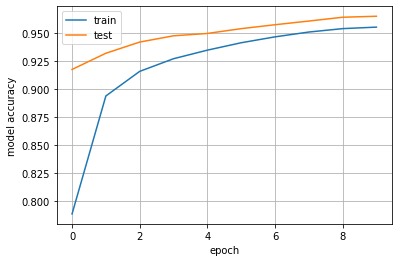

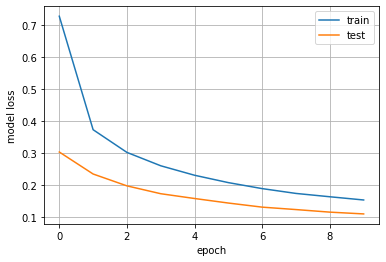

In [9]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid()
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid()
plt.show()

Here is the results for SGD. Both accuracy and loss show a progressive improvement along the 10 epochs. In particular, the accuracy is 0.966 while the loss is around 0.111 for the test dataset at the end of the training.

#### ADAM

In [10]:
def create_CNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='adam',
                  metrics=['accuracy'])
    return model

In [11]:
# training parameters
batch_size = 32
epochs = 10

# create the deep neural net
model_DNN = create_CNN()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2826 - accuracy: 0.9174 - val_loss: 0.1039 - val_accuracy: 0.9693
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1210 - accuracy: 0.9654 - val_loss: 0.0935 - val_accuracy: 0.9719
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0878 - accuracy: 0.9743 - val_loss: 0.0771 - val_accuracy: 0.9764
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0683 - accuracy: 0.9798 - val_loss: 0.0786 - val_accuracy: 0.9781
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0573 - accuracy: 0.9825 - val_loss: 0.0763 - val_accuracy: 0.9801
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0456 - accuracy: 0.9858 - val_loss: 0.1000 - val_accuracy: 0.9764
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0428 - accuracy: 0.9867 - val_loss: 0.0981 - val_accuracy:

313/313 [==============================] - 0s 906us/step - loss: 0.0855 - accuracy: 0.9807

Test loss: 0.08553847670555115
Test accuracy: 0.9807000160217285


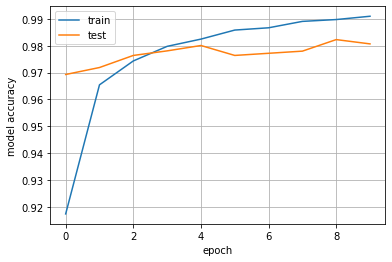

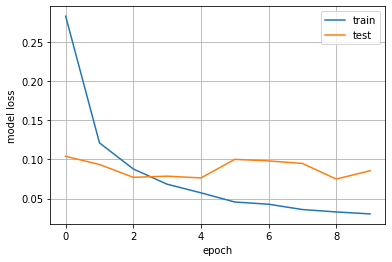

In [12]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid()
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid()
plt.show()

The second optimization function tested is the adam. It shows different trends in respect of the SGD. The model accuracy is between 0.97 and 0.98 and it is stable during the training. It cannot be said for the model loss. This figure increases from 0.12 at the beginning of the training to 0.20 at the end of it. \
It is straightforward to say that SGD works better than adam because the latter has a much higher loss.

#### NADAM

In [13]:
def create_CNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='nadam',
                  metrics=['accuracy'])
    return model

In [14]:
# training parameters
batch_size = 32
epochs = 10

# create the deep neural net
model_DNN = create_CNN()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2754 - accuracy: 0.9199 - val_loss: 0.1009 - val_accuracy: 0.9685
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1187 - accuracy: 0.9654 - val_loss: 0.0892 - val_accuracy: 0.9740
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0849 - accuracy: 0.9751 - val_loss: 0.0746 - val_accuracy: 0.9769
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0673 - accuracy: 0.9798 - val_loss: 0.0813 - val_accuracy: 0.9756
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0544 - accuracy: 0.9833 - val_loss: 0.0837 - val_accuracy: 0.9786
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0464 - accuracy: 0.9858 - val_loss: 0.0723 - val_accuracy: 0.9810
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0438 - accuracy: 0.9868 - val_loss: 0.0765 - val_ac

313/313 [==============================] - 0s 894us/step - loss: 0.0913 - accuracy: 0.9810

Test loss: 0.09128383547067642
Test accuracy: 0.9810000061988831


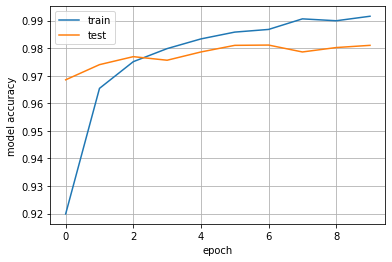

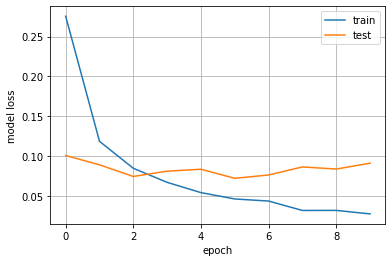

In [15]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid()
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid()
plt.show()

The last function to be tested is the nadam. This optimization function turned out to be the best for this type of network. After 10 epochs, the accuracy of the model predictions on the test dataset is more than 0.98 and the loss is less than 0.10. 

### EX 12_2

Now, a deep convolutional network is trained to recognize written digits.\
First, the dataset are again reshaped to restore the original 28x28 pixel format and to add the number of channel which, in this case, is one.

In [43]:
# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


Here the DCNN is created and trained. The network consists in:
- a convolutional 2D layer with 10 filters and a kernel size of 5x5 with a relu activation function followed by a 2D max pooling of size 2x2.
- another convolutional 2D layer with 20 filters with a 5x5 kernel and a relu activation function followed by a 2D max pooling identical to the previous one
- a flattening layer
- a 400-neurons dense layer witha relu activation function
- a 10-neurons output layer with a softmax activation function to translate the output from the previous layer into a probability

The network is trained for 10 epochs with the previously tested nadam optimization function.

In [44]:
def create_DCNN():
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(10, kernel_size=(5, 5),activation='relu',input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(20, kernel_size=(5, 5),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    #model.output_shape
    model.add(Dense(400, activation='relu'))
    #model.output_shape
    model.add(Dense(10, activation='softmax'))
    #model.output_shape

    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='nadam',
                  metrics=['accuracy'])
    return model

In [45]:
# training parameters
batch_size = 32
epochs = 10

# create the deep neural net
model_DCNN = create_DCNN()

# train DNN and store training info in history
history = model_DCNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1350 - accuracy: 0.9590 - val_loss: 0.0407 - val_accuracy: 0.9873
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0436 - accuracy: 0.9865 - val_loss: 0.0391 - val_accuracy: 0.9874
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0310 - accuracy: 0.9898 - val_loss: 0.0334 - val_accuracy: 0.9903
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0251 - accuracy: 0.9917 - val_loss: 0.0343 - val_accuracy: 0.9894
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0191 - accuracy: 0.9940 - val_loss: 0.0374 - val_accuracy: 0.9880
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0162 - accuracy: 0.9948 - val_loss: 0.0383 - val_accuracy: 0.9892
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0140 - accuracy: 0.9952 - val_loss: 0.0288 - val_ac

313/313 [==============================] - 1s 3ms/step - loss: 0.0435 - accuracy: 0.9900

Test loss: 0.04353860020637512
Test accuracy: 0.9900000095367432


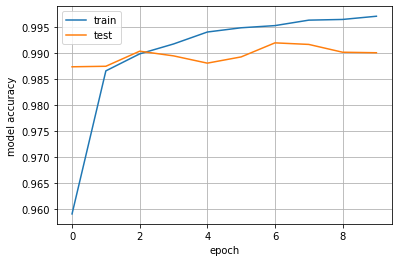

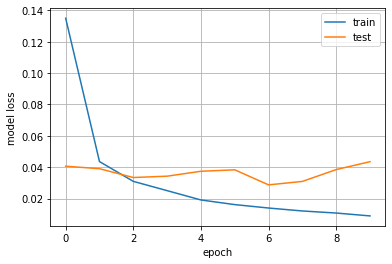

In [46]:
# evaluate model
score = model_DCNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid()
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid()
plt.show()

In the terms of loss and accuracy, this network works much better than the ones without convolutional layers. The accuracy is around 0.99 while the loss is around 0.04 on the test dataset at the end of the training. 

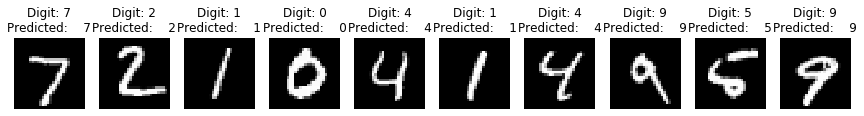

In [47]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DCNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

This image shows the prediction power of the networks on the test dataset. It is capable of recognize all the written digits, even the 5 in the second to last image (which even I can't recognize).

### EX 12_3

Here below there is a code that tests the prediction of the DCNN trained in the second exercise with ten "handwritten" digits created using gimp.

In [1]:
digit_filename = "digits/five.png"
digit_in = Image.open(digit_filename).convert('L')

ydim, xdim = digit_in.size
pix=digit_in.load();
data = np.zeros((xdim, ydim))
for j in range(ydim):
    for i in range(xdim):
        data[i,j]=pix[j,i]

data /= 255

plt.figure(figsize=(5,5))
plt.imshow(data, cmap='gray')
plt.show()

NameError: name 'Image' is not defined

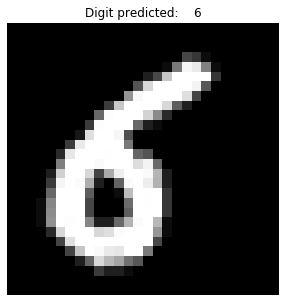

In [79]:
data = data.reshape(1,img_rows,img_cols,1)
pred_0 = model_DNN.predict(data)

data = data.reshape(xdim,ydim)

plt.figure(figsize=(5, 5))  
plt.imshow(data, cmap='gray')    
plt.title("Digit predicted:    {}".format(np.argmax(pred_0)))
plt.axis('off') 
plt.show()

These ten digits were properly written so the DCNN was able to predict all of them correctly.

Here's an example of an badly coloured eight: the network is not able to recognize it.

Image size: 28x28


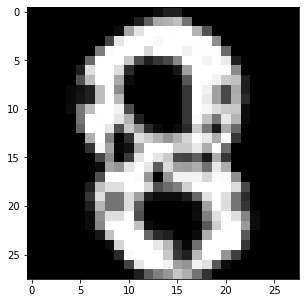

In [85]:
digit_filename = "digits/error.png"
digit_in = Image.open(digit_filename).convert('L')

ydim, xdim = digit_in.size
print("Image size: "+str(xdim)+"x"+str(ydim))
pix=digit_in.load();
data = np.zeros((xdim, ydim))
for j in range(ydim):
    for i in range(xdim):
        data[i,j]=pix[j,i]

data /= 255

plt.figure(figsize=(5,5))
plt.imshow(data, cmap='gray')
plt.show()

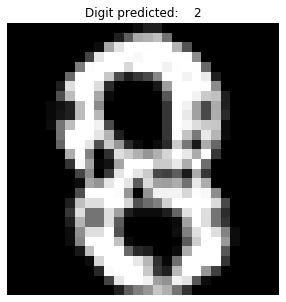

In [86]:
data = data.reshape(1,img_rows,img_cols,1)
pred_0 = model_DNN.predict(data)

data = data.reshape(xdim,ydim)

plt.figure(figsize=(5, 5))  
plt.imshow(data, cmap='gray')    
plt.title("Digit predicted:    {}".format(np.argmax(pred_0)))
plt.axis('off') 
plt.show()